# Data Analysis

**Objective** : analyze the data to identify actionable patterns which we can use to decrease churn rate for the company, and create graphs and tables for the presenting.

In [1]:
# load basic tools
import pandas as pd             # data manipulation
import numpy as np              # data manipulation, and calculations
import matplotlib.pyplot as plt # graphical tools
import seaborn as sns           # graphical tools, simpler API

import datetime as dt           # pandas tools for extracting time data

In [2]:
# changing basic enviornment configuration
%matplotlib inline
pd.set_option('display.max_columns', 500) # display up to 500 columns in data frame

# STEP 1 - LOAD DATA

## STEP 1.1 - Load Desired Data

In [3]:
# position terminal in desired file
%cd ..

/Users/pma/Documents/GitHub/DATATHON_2


In [4]:
# import all the datasets by individual sheets
activities = pd.read_excel('Data/Original/Activities.xlsx', 'commercial acts')

In [5]:
codes_languages = pd.read_excel('Data/Original/Codes.xlsx', 'Languages')
codes_current_support = pd.read_excel('Data/Original/Codes.xlsx', 'Current Support')
codes_educational_material = pd.read_excel('Data/Original/Codes.xlsx', 'Educational Material')
codes_educational_subject = pd.read_excel('Data/Original/Codes.xlsx', 'Subject')
codes_educational_course = pd.read_excel('Data/Original/Codes.xlsx', 'Course')

In [6]:
coverges = pd.read_excel('Data/Original/Coverages.xlsx', 'coverages')

In [7]:
dates = pd.read_excel('Data/Original/Dates.xlsx', 'dates')
dates = dates[['Course Year', 'Type', 'Min_Date', 'Max_Date', 'Course_Start', 'Course_End']] # remove tables for human analysis in excel

In [8]:
marketing_actions_2019 = pd.read_excel('Data/Original/Marketing actions.xlsx', '2019')
marketing_actions_2018 = pd.read_excel('Data/Original/Marketing actions.xlsx', '2018')
marketing_actions_2017 = pd.read_excel('Data/Original/Marketing actions.xlsx', '2017')
marketing_actions_2016 = pd.read_excel('Data/Original/Marketing actions.xlsx', '2016')
marketing_actions_2015 = pd.read_excel('Data/Original/Marketing actions.xlsx', '2015')

In [9]:
school_locations = pd.read_excel('Data/Original/School locations.xlsx', 'schools')

In [10]:
survey_2015 = pd.read_csv('Data/Original/2015Surveys_sample.csv', sep = ';')
survey_2016 = pd.read_csv('Data/Original/2016Surveys_sample.csv', sep = ';')
survey_2017 = pd.read_csv('Data/Original/2017Surveys_sample.csv', sep = ';')
survey_2018 = pd.read_csv('Data/Original/2018Surveys_sample.csv', sep = ';')
survey_2019 = pd.read_csv('Data/Original/2019Surveys_sample.csv', sep = ';')

## STEP 1.2 - DATA PREPARATION
### STEP 1.2.1 - APPEND CONTINOUS DATA

In [11]:
# join servey data
survey = survey_2015.append(survey_2016, ignore_index = True)
survey = survey.append(survey_2017, ignore_index = True)
survey = survey.append(survey_2018, ignore_index = True)
survey = survey.append(survey_2019, ignore_index = True)

In [12]:
marketing_actions = marketing_actions_2015.append(marketing_actions_2016, ignore_index = True)
marketing_actions = marketing_actions.append(marketing_actions_2017, ignore_index = True)
marketing_actions = marketing_actions.append(marketing_actions_2018, ignore_index = True)
marketing_actions = marketing_actions.append(marketing_actions_2019, ignore_index = True)

In [13]:
display(activities.head(3), coverges.head(3), school_locations.head(3), survey.head(3), dates.head(3), marketing_actions.head(3))

,Date,Type activity,Customer heading,Cicle / Department 1,Cicle / Department 2,Cicle / Department 3,Cicle / Department 4,Delegation
0,2018-07-02,Commercial,122996.0,ADMINISTRATION,NaN,NaN,NaN,PAÍS VASCO
1,2018-07-02,Commercial,171905.0,ADMINISTRATION,NaN,NaN,NaN,ANDALUCÍA-EXTREMADURA
2,2018-07-03,Implementation,196818.0,ADMINISTRATION,NaN,NaN,NaN,CANARIAS


,Customer Heading,Current id_Representative,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,113896,1228.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,113897,1228.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,113898,1000.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN


,Customer heading,Latitude,Longitude,Town,Province,Region,Current Seller id,Institution,Titularity
0,113956,42.852859,-2.668525,VITORIA-GASTEIZ,Álava,País Vasco,154.0,No,Catholic
1,113958,42.853774,-2.391622,SALVATIERRA-AGURAIN,Álava,País Vasco,154.0,No,Private
2,113960,42.841873,-2.681587,VITORIA-GASTEIZ,Álava,País Vasco,154.0,No,Catholic


,Year,Course,Subject,Educational Material,Language,Type Current Support,# copies,Publishing group,Customer heading
0,2015,26,13,1,11,1,19,1,121271.0
1,2015,26,13,1,11,1,16,1,121274.0
2,2015,26,13,1,11,1,25,1,121280.0


,Course Year,Type,Min_Date,Max_Date,Course_Start,Course_End
0,2019,Marketing action 3,2019-07-01,2019-09-30,2019-06-01,2020-06-01
1,2019,Marketing action 1,2019-01-01,2019-04-30,2019-01-01,2020-01-01
2,2019,Marketing action 2,2019-08-25,2019-11-30,2019-05-15,2020-05-15


,Year,Customer heading,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3
0,2015.0,113911,29/10/2015,0.0,NaN,1.0
1,2015.0,113911,22/06/2015,0.0,NaN,NaN
2,2015.0,113911,11/02/2015,0.0,NaN,1.0


### STEP 1.2.2 - MANAGE MISSING VALUES

In [14]:
#activities.astype({'Customer heading': 'int64'})
display(print('activities \n\n', activities.isnull().sum(), activities.shape,
              '\n\n coverges \n\n', coverges.isnull().sum(), coverges.shape,
              '\n\n survey \n\n', survey.isnull().sum(), survey.shape,
              '\n\n marketing actions \n\n', marketing_actions.isnull().sum(), marketing_actions.shape
             )
       )

activities 

 Date                         0
Type activity            65718
Customer heading           157
Cicle / Department 1       646
Cicle / Department 2    133722
Cicle / Department 3    155365
Cicle / Department 4    158787
Delegation                 102
dtype: int64 (159550, 8) 

 coverges 

 Customer Heading                 0
Current id_Representative        6
2011                         69255
2012                         67055
2013                         67290
2014                         66129
2015                         65295
2016                         63433
2017                         62220
2018                         62038
2019                         61824
dtype: int64 (122171, 11) 

 survey 

 Year                       0
Course                     0
Subject                    0
Educational Material       0
Language                   0
Type Current Support       0
# copies                   0
Publishing group         154
Customer heading        2301
dtype: int64 

None

In [15]:
#activities.astype({'Customer heading': 'int64'})
display(activities.head(3),
        coverges.head(3),
        survey.head(3),
        marketing_actions.head(3)
       )

,Date,Type activity,Customer heading,Cicle / Department 1,Cicle / Department 2,Cicle / Department 3,Cicle / Department 4,Delegation
0,2018-07-02,Commercial,122996.0,ADMINISTRATION,NaN,NaN,NaN,PAÍS VASCO
1,2018-07-02,Commercial,171905.0,ADMINISTRATION,NaN,NaN,NaN,ANDALUCÍA-EXTREMADURA
2,2018-07-03,Implementation,196818.0,ADMINISTRATION,NaN,NaN,NaN,CANARIAS


,Customer Heading,Current id_Representative,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,113896,1228.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,113897,1228.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,113898,1000.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN


,Year,Course,Subject,Educational Material,Language,Type Current Support,# copies,Publishing group,Customer heading
0,2015,26,13,1,11,1,19,1,121271.0
1,2015,26,13,1,11,1,16,1,121274.0
2,2015,26,13,1,11,1,25,1,121280.0


,Year,Customer heading,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3
0,2015.0,113911,29/10/2015,0.0,NaN,1.0
1,2015.0,113911,22/06/2015,0.0,NaN,NaN
2,2015.0,113911,11/02/2015,0.0,NaN,1.0


In [16]:
# activities: eliminating nulls

activities.loc[activities['Cicle / Department 1'].isnull(),'Cicle / Department 1'] = 0
activities.loc[activities['Cicle / Department 2'].isnull(),'Cicle / Department 2'] = 0
activities.loc[activities['Cicle / Department 3'].isnull(),'Cicle / Department 3'] = 0
activities.loc[activities['Cicle / Department 4'].isnull(),'Cicle / Department 4'] = 0

# these activities are represented by null values, since they contain alot of different information in columns these will be labled as 'un_classified'
activities.loc[activities['Type activity'].isnull(), 'Type activity'] = 'un_classified'
activities.loc[activities['Delegation'].isnull(), 'Delegation'] = 'un_classified'

# this columns contains alot of missing customer_id, these will b dropped to because we cannot merge with anything else
activities = activities.drop(activities.loc[activities['Customer heading'].isnull()].index, axis = 0)

In [17]:
# coverages: eliminating nulls
# in this case nulls in the year columns imply no action, so will be substituted by zero
coverges.loc[coverges[2011].isnull(), 2011] = 0
coverges.loc[coverges[2012].isnull(), 2012] = 0
coverges.loc[coverges[2013].isnull(), 2013] = 0
coverges.loc[coverges[2014].isnull(), 2014] = 0
coverges.loc[coverges[2015].isnull(), 2015] = 0
coverges.loc[coverges[2016].isnull(), 2016] = 0
coverges.loc[coverges[2017].isnull(), 2017] = 0
coverges.loc[coverges[2018].isnull(), 2018] = 0
coverges.loc[coverges[2019].isnull(), 2019] = 0

# for id_representative missign will be labled as 0 to use format column as int
coverges.loc[coverges['Current id_Representative'].isnull(), 'Current id_Representative'] = 0

In [18]:
# survey: eliminating nulls

# Educational Material & Educational material: many of the NaN in this column are contained in Educational Material
# so I mannually changed the heading of the '2019Surveys_sample.csv' & '2015Surveys_sample.csv' to match the others


# Publisher group: will with NaN will be assigned 0; this is a categorical column
survey['Publishing group'] = survey.loc[survey['Publishing group'].isnull(), 'Publishing group'] = 0

# Customer heading: with NaN will be dropped
survey = survey.drop(labels = survey.loc[survey['Customer heading'].isnull()].index, axis = 0)

In [19]:
# marketing_actions: eliminating nulls

#Mkt_action # : number of actions performed, if NaN Prof said to consider as 0
marketing_actions.loc[marketing_actions['# Mkt_action 1'].isnull(), '# Mkt_action 1'] = 0
marketing_actions.loc[marketing_actions['# Mkt_action 2'].isnull(), '# Mkt_action 2'] = 0
marketing_actions.loc[marketing_actions['# Mkt_action 3'].isnull(), '# Mkt_action 3'] = 0

# if other nulls exsist assume as empty cells, because of correlation
marketing_actions = marketing_actions.drop(labels = marketing_actions.loc[marketing_actions['Year'].isnull()].index, axis = 0)

### STEP 1.2.3 - FORMAT DATA FOR JOINING

In [20]:
# formatting 'code' dataframes as int data type for merging
codes_current_support.loc[codes_current_support['Current Support'] == '#', 'Current Support'] = 0
codes_current_support['Current Support'] = codes_current_support['Current Support'].astype(int)
codes_educational_material.loc[codes_educational_material['Educational Material'] == '#', 'Educational Material'] = 0
codes_educational_material['Educational Material'] = codes_educational_material['Educational Material'].astype(int)
codes_educational_course.loc[codes_educational_course['Course'] == '#', 'Course'] = 0
codes_educational_course['Course'] = codes_educational_course['Course'].astype(int)

In [21]:
# formatting activities
activities['Type activity'] = activities['Type activity'].astype('category')
activities['Customer heading'] = activities['Customer heading'].astype(int)
activities['Cicle / Department 1'] = activities['Cicle / Department 1'].astype('category')
activities['Cicle / Department 2'] = activities['Cicle / Department 2'].astype('category')
activities['Cicle / Department 3'] = activities['Cicle / Department 3'].astype('category')
activities['Cicle / Department 4'] = activities['Cicle / Department 4'].astype('category')
activities['Delegation'] = activities['Delegation'].astype(str)

In [22]:
# formatting coverges
coverges['Customer Heading'] = coverges['Customer Heading'].astype(int)
coverges['Current id_Representative'] = coverges['Current id_Representative'].astype(int)
coverges[2011] = coverges[2011].astype(int)
coverges[2012] = coverges[2012].astype(int)
coverges[2013] = coverges[2013].astype(int)
coverges[2014] = coverges[2014].astype(int)
coverges[2015] = coverges[2015].astype(int)
coverges[2016] = coverges[2016].astype(int)
coverges[2017] = coverges[2017].astype(int)
coverges[2018] = coverges[2017].astype(int)
coverges[2019] = coverges[2019].astype(int)

In [23]:
# formatting survey
survey['Year'] = survey['Year'].astype(int)
survey['Course'] = survey['Course'].astype(int)
survey['Subject'] = survey['Subject'].astype(int)
survey['Educational Material'] = survey['Educational Material'].astype(int)
survey['# copies'] = survey['# copies'].astype(int)
survey['Publishing group'] = survey['Publishing group'].astype(int)
survey['Customer heading'] = survey['Customer heading'].astype(int)

In [24]:
# customer heading has 2 anomallies for year 2015, these will be dropped to fit standard
marketing_actions.loc[marketing_actions['Customer heading'].str.isnumeric() == False, 'Customer heading'] = 0
marketing_actions['Customer heading'] = marketing_actions['Customer heading'].astype(int)

In [25]:
# formatting marketing_actions
marketing_actions['Year'] = marketing_actions['Year'].astype(int)
marketing_actions['Day sent'] = pd.to_datetime(marketing_actions['Day sent'])
marketing_actions['# Mkt_action 1'] = marketing_actions['# Mkt_action 1'].astype(int)
marketing_actions['# Mkt_action 2'] = marketing_actions['# Mkt_action 2'].astype(int)
marketing_actions['# Mkt_action 3'] = marketing_actions['# Mkt_action 3'].astype(int)

> Important note last instance of marketing_activity 3 was changed manually in the dates excel file. Due to professor's clarification.

In [26]:
# formatting dates
dates['Type'] = dates['Type'].astype('category')

# grouping marketing actions in one column
dates.loc[dates['Type'] == 'Marketing action 1', 'Mkt_actions'] = 1
dates.loc[dates['Type'] == 'Marketing action 2', 'Mkt_actions'] = 2
dates.loc[dates['Type'] == 'Marketing action 3', 'Mkt_actions'] = 3
# formatting as int
dates['Mkt_actions'] = dates['Mkt_actions'].astype(int)

### STEP 1.2.4 - JOIN DATA

In [246]:
# join 'survey' with 'codes' dataframes
survey = survey.merge(right = codes_languages, how = 'left', left_on = 'Language', right_on = 'Id_Lang').drop('Id_Lang', axis = 1)
survey = survey.merge(right = codes_current_support, how = 'left', left_on = 'Type Current Support', right_on = 'Current Support').drop('Current Support', axis = 1)
survey = survey.merge(right = codes_educational_subject, how = 'left', left_on = 'Subject', right_on = 'Id_Subject').drop('Id_Subject', axis = 1)
survey = survey.merge(right = codes_educational_material, how = 'left', left_on = 'Educational Material', right_on = 'Educational Material').drop('Educational Material', axis = 1)
survey = survey.merge(right = codes_educational_course, how = 'left', left_on = 'Course', right_on = 'Course')

# codes_educational_subject does not contain a classification for all 'N_Subject', so un classified
# will be labled as un_known
survey.loc[survey['N_Subject'].isnull(), 'N_Subject'] = 'un_known'

KeyError: 'Educational Material'

### STEP 1.2.5 - EXPORT DATA TO CSV & EXTRA

Data is exported to CSV for faster sharing between teamates.
Unused DataFrames will be deleted to save memeory.

In [28]:
# export data to csv for faster loading and sharing amoung the gorup
activities.to_csv('Data/Cleaned/activities.csv', index = False)
coverges.to_csv('Data/Cleaned/coverges.csv', index = False)
dates.to_csv('Data/Cleaned/dates.csv', index = False)
survey.to_csv('Data/Cleaned/survey.csv', index = False)
school_locations.to_csv('Data/Cleaned/school_locations.csv', index = False)

In [29]:
# reduce ram usage
# create a list with all unused dataframes
lst = [marketing_actions_2019, marketing_actions_2018, marketing_actions_2017, marketing_actions_2016, marketing_actions_2015,
       survey_2015, survey_2016, survey_2017, survey_2018, survey_2019,
       codes_languages, codes_current_support, codes_educational_material, codes_educational_subject, codes_educational_course]

# delet above reated list from memory
del lst

In [30]:
display(activities.head(3), coverges.head(3), school_locations.head(3), survey.head(3), dates.head(3), marketing_actions.head(3))

,Date,Type activity,Customer heading,Cicle / Department 1,Cicle / Department 2,Cicle / Department 3,Cicle / Department 4,Delegation
0,2018-07-02,Commercial,122996,ADMINISTRATION,0,0,0,PAÍS VASCO
1,2018-07-02,Commercial,171905,ADMINISTRATION,0,0,0,ANDALUCÍA-EXTREMADURA
2,2018-07-03,Implementation,196818,ADMINISTRATION,0,0,0,CANARIAS


,Customer Heading,Current id_Representative,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,113896,1228,1,1,1,1,1,1,1,1,1
1,113897,1228,1,1,1,1,1,1,1,1,1
2,113898,1000,1,1,1,1,1,1,0,0,0


,Customer heading,Latitude,Longitude,Town,Province,Region,Current Seller id,Institution,Titularity
0,113956,42.852859,-2.668525,VITORIA-GASTEIZ,Álava,País Vasco,154.0,No,Catholic
1,113958,42.853774,-2.391622,SALVATIERRA-AGURAIN,Álava,País Vasco,154.0,No,Private
2,113960,42.841873,-2.681587,VITORIA-GASTEIZ,Álava,País Vasco,154.0,No,Catholic


,Year,Course,Subject,Language,Type Current Support,# copies,Publishing group,Customer heading,N_Lang,N_Support,N_Subject,N_Educational Material,N_Course
0,2015,26,13,11,1,19,0,121271,Galician,Paper,Natural Sciences,Basic,1º Primary
1,2015,26,13,11,1,16,0,121274,Galician,Paper,Natural Sciences,Basic,1º Primary
2,2015,26,13,11,1,25,0,121280,Galician,Paper,Natural Sciences,Basic,1º Primary


,Course Year,Type,Min_Date,Max_Date,Course_Start,Course_End,Mkt_actions
0,2019,Marketing action 3,2019-07-01,2019-09-30,2019-06-01,2020-06-01,3
1,2019,Marketing action 1,2019-01-01,2019-04-30,2019-01-01,2020-01-01,1
2,2019,Marketing action 2,2019-08-25,2019-11-30,2019-05-15,2020-05-15,2


,Year,Customer heading,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3
0,2015,113911,2015-10-29,0,0,1
1,2015,113911,2015-06-22,0,0,0
2,2015,113911,2015-11-02,0,0,1


# STEP 2 - DATA EXPLORATION
## STEP 2.1 - FEATURE GENERATION & MERGING

**Feature generation for late days of marketing actions.**

### STEP 2.1.1 - MARKETING_ACTIONS & DATES
This step aims to unify the dataframes: **marketin_actions** & **dates**. The objective is to calculate the fallowing KPIs

- marketing actions performed within required datelines
- how late or eary were marketing actions performed in ralation to important dates

The resulting table will allow for the merging with all other datasets using *Customer heading* and *Year* features, for aditional features for model training and strategy development.

In [42]:
display(marketing_actions.head(), dates.head())

,Year,Customer heading,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3
0,2015,113911,2015-10-29,0,0,1
1,2015,113911,2015-06-22,0,0,0
2,2015,113911,2015-11-02,0,0,1
3,2015,113911,2015-10-29,0,0,1
4,2015,113911,2015-06-17,1,0,0


,Course Year,Type,Min_Date,Max_Date,Course_Start,Course_End,Mkt_actions
0,2019,Marketing action 3,2019-07-01,2019-09-30,2019-06-01,2020-06-01,3
1,2019,Marketing action 1,2019-01-01,2019-04-30,2019-01-01,2020-01-01,1
2,2019,Marketing action 2,2019-08-25,2019-11-30,2019-05-15,2020-05-15,2
3,2018,Marketing action 3,2018-07-01,2018-09-30,2018-06-01,2019-06-01,3
4,2018,Marketing action 1,2018-01-01,2018-04-30,2018-01-01,2019-01-01,1


In [207]:
# create new table for manipulating marketing_actions whilel maintaining integrity
mkt_actions = marketing_actions.copy()

# grouping marketing actions in one column
mkt_actions.loc[mkt_actions['# Mkt_action 1'] != 0, 'Mkt_actions'] = 1
mkt_actions.loc[mkt_actions['# Mkt_action 2'] != 0, 'Mkt_actions'] = 2
mkt_actions.loc[mkt_actions['# Mkt_action 3'] != 0, 'Mkt_actions'] = 3

# assume nulls represent times where no marketing actions was taken
mkt_actions.loc[mkt_actions['Mkt_actions'].isnull(), 'Mkt_actions'] = 0

#meaure impact of marketing actions
mkt_actions.loc[mkt_actions['# Mkt_action 1'] != 0, 'Mkt_impact'] = mkt_actions['# Mkt_action 1']
mkt_actions.loc[mkt_actions['# Mkt_action 2'] != 0, 'Mkt_impact'] = mkt_actions['# Mkt_action 2']
mkt_actions.loc[mkt_actions['# Mkt_action 3'] != 0, 'Mkt_impact'] = mkt_actions['# Mkt_action 3']
mkt_actions.loc[mkt_actions['Mkt_impact'].isnull(), 'Mkt_impact'] = 0

# format mkt_actions as int
mkt_actions['Mkt_actions'] = mkt_actions['Mkt_actions'].astype(int)
mkt_actions['Mkt_impact'] = mkt_actions['Mkt_impact'].astype(int)

In [208]:
#mkt_actions.loc[mkt_actions['Mkt_actions'].isnull()].sum()

display(mkt_actions['Mkt_actions'].isnull().sum(), mkt_actions.shape, mkt_actions.head())

0

(1830189, 8)

,Year,Customer heading,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3,Mkt_actions,Mkt_impact
0,2015,113911,2015-10-29,0,0,1,3,1
1,2015,113911,2015-06-22,0,0,0,0,0
2,2015,113911,2015-11-02,0,0,1,3,1
3,2015,113911,2015-10-29,0,0,1,3,1
4,2015,113911,2015-06-17,1,0,0,1,1


In [209]:
# create new table for manipulating date data
d = dates.copy()
d['deadline_start_month'] = d['Min_Date'].dt.month
d['deadline_start_day'] = d['Min_Date'].dt.day

d['deadline_end_month'] = d['Max_Date'].dt.month
d['deadline_end_day'] = d['Max_Date'].dt.day

d['course_start_month'] = d['Course_Start'].dt.month
d['course_start_day'] = d['Course_Start'].dt.day

d['course_end_month'] = d['Course_End'].dt.month
d['course_end_day'] = d['Course_End'].dt.day

d = d.drop(labels = d[['Min_Date', 'Max_Date', 'Course_Start', 'Course_End', 'Type', 'Course Year']], axis = 1)
d = d.drop_duplicates()

,Mkt_actions,deadline_start_month,deadline_start_day,deadline_end_month,deadline_end_day,course_start_month,course_start_day,course_end_month,course_end_day
0,3,7,1,9,30,6,1,6,1
1,1,1,1,4,30,1,1,1,1
2,2,8,25,11,30,5,15,5,15


In [211]:
# merge mkt_actions and dates
x = pd.merge(left = mkt_actions, right = d, how = 'left', on = 'Mkt_actions')


#handle nulls after merge
x.loc[x['deadline_start_month'].isnull(), 'deadline_start_month'] = 0
x.loc[x['deadline_start_day'].isnull(), 'deadline_start_day'] = 0

x.loc[x['deadline_end_month'].isnull(), 'deadline_end_month'] = 0
x.loc[x['deadline_end_day'].isnull(), 'deadline_end_day'] = 0

x.loc[x['course_start_month'].isnull(), 'course_start_month'] = 0
x.loc[x['course_start_day'].isnull(), 'course_start_day'] = 0

x.loc[x['course_end_month'].isnull(), 'course_end_month'] = 0
x.loc[x['course_end_day'].isnull(), 'course_end_day'] = 0

# format as int
x['deadline_start_month'] = x['deadline_start_month'].astype(int)
x['deadline_start_day'] = x['deadline_start_day'].astype(int)

x['deadline_end_month'] = x['deadline_end_month'].astype(int)
x['deadline_end_day'] = x['deadline_end_day'].astype(int)

x['course_start_month'] = x['course_start_month'].astype(int)
x['course_start_day'] = x['course_start_day'].astype(int)

x['course_end_month'] = x['course_end_month'].astype(int)
x['course_end_day'] = x['course_end_day'].astype(int)

In [212]:
# remove all zero values for date convertion (pandas cannot understand a date like 20150000, so
# these must be removed)
temp = x.loc[x['Mkt_actions'] != 0]

# convert separated date values to complete dates
temp['dead_line_start'] = pd.to_datetime(temp.Year*10000+temp.deadline_start_month*100+temp.deadline_start_day,format='%Y%m%d')
temp['dead_line_end'] = pd.to_datetime(temp.Year*10000+temp.deadline_end_month*100+temp.deadline_end_day,format='%Y%m%d')

temp['course_start'] = pd.to_datetime(temp.Year*10000+temp.course_start_month*100+temp.course_start_day,format='%Y%m%d')
temp['course_end'] = pd.to_datetime(temp.Year*10000+temp.course_end_month*100+temp.course_end_day,format='%Y%m%d')

# remove unesesary data
#temp = temp[['Year', 'Day sent', 'Mkt_actions','dead_line_start',
#             'dead_line_end', 'course_start', 'course_end']]

# this methods is way slower but output is float
temp['days_dif_deadline_end'] = pd.Series(delta.days for delta in (temp['Day sent'] - temp['dead_line_end']))
temp['days_dif_deadline_start'] = pd.Series(delta.days for delta in (temp['Day sent'] - temp['dead_line_start']))
temp['days_dif_course_start'] = pd.Series(delta.days for delta in (temp['Day sent'] - temp['course_start']))
temp['days_dif_course_end'] = pd.Series(delta.days for delta in (temp['Day sent'] - temp['course_end']))

# format data as int
#temp['days_dif_deadline_end'] = temp['days_dif_deadline_end'].astype(int)
#temp['days_dif_deadline_start'] = temp['days_dif_deadline_start'].astype(int)
#temp['days_dif_course_start'] = temp['days_dif_course_start'].astype(int)
#temp['days_dif_course_end'] = temp['days_dif_course_end'].astype(int)

#this method is way faster but output is timedelta64
#temp['days_dif_deadline_end'] = temp['Day sent'] - temp['dead_line_end']
#temp['days_dif_deadline_start'] = temp['Day sent'] - temp['dead_line_start']
#temp['days_dif_course_start'] = temp['Day sent'] - temp['course_start']
#temp['days_dif_course_end'] = temp['Day sent'] - temp['course_end']
#temp.head()

# computing status of action if late (1 = True)
temp.loc[(temp['days_dif_course_end'] < 0) | (temp['days_dif_course_start'] >= 0), 'action_during_class'] = 1
temp.loc[(temp['days_dif_course_end'] > 0) | (temp['days_dif_course_start'] < 0), 'action_during_class'] = 0

temp.loc[(temp['days_dif_deadline_end'] < 0) | (temp['days_dif_deadline_start'] >= 0), 'action_during_deadline'] = 1
temp.loc[(temp['days_dif_deadline_end'] > 0) | (temp['days_dif_deadline_start'] < 0), 'action_during_deadline'] = 1

#temp.loc[temp['days_dif_course_start'] > 0, 'late_days_dif_course_start'] = 1
#temp.loc[temp['days_dif_course_start'] <= 0, 'late_days_dif_course_start'] = 0

#temp.loc[temp['days_dif_course_end'] > 0, 'late_days_dif_course_end'] = 1
#temp.loc[temp['days_dif_course_end'] <= 0, 'late_days_dif_course_end'] = 0

# formating data type
#temp['late_status_dif_course_end'] = temp['late_status_dif_course_end'].astype(bool)
#temp['late_status_dif_deadline_start'] = temp['late_status_dif_deadline_start'].astype(bool)
#temp['late_days_dif_course_start'] = temp['late_days_dif_course_start'].astype(bool)
#temp['late_days_dif_course_end'] = temp['late_days_dif_course_end'].astype(bool)

temp['action_during_class'] = temp['action_during_class'].astype(bool)
temp['action_during_deadline'] = temp['action_during_deadline'].astype(bool)

/Users/pma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/pma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [213]:
# remove cells with 0 activities contained in x
x = x.loc[x['Mkt_actions'] == 0]

# append x temporary dataset to temp
temp = temp.append(other = x, ignore_index = True)

# substitute null values with 0
temp.loc[temp['dead_line_start'].isnull(), 'dead_line_start'] = 0
temp.loc[temp['dead_line_end'].isnull(), 'dead_line_end'] = 0
temp.loc[temp['course_start'].isnull(), 'course_start'] = 0
temp.loc[temp['course_end'].isnull(), 'course_end'] = 0
temp.loc[temp['days_dif_deadline_start'].isnull(), 'days_dif_deadline_start'] = 0
temp.loc[temp['days_dif_deadline_end'].isnull(), 'days_dif_deadline_end'] = 0
temp.loc[temp['days_dif_course_start'].isnull(), 'days_dif_course_start'] = 0
temp.loc[temp['days_dif_course_end'].isnull(), 'days_dif_course_end'] = 0
temp.loc[temp['action_during_class'].isnull(), 'action_during_class'] = 0
temp.loc[temp['action_during_deadline'].isnull(), 'action_during_deadline'] = 0

# remove cells contained in temp
x = x.loc[x['Mkt_actions'] == 0]

In [214]:
# append x temporary dataset to temp
temp = temp.append(other = x, ignore_index = True)

# substitute null values with 0
temp.loc[temp['dead_line_start'].isnull(), 'dead_line_start'] = 0
temp.loc[temp['dead_line_end'].isnull(), 'dead_line_end'] = 0
temp.loc[temp['course_start'].isnull(), 'course_start'] = 0
temp.loc[temp['course_end'].isnull(), 'course_end'] = 0
temp.loc[temp['days_dif_deadline_start'].isnull(), 'days_dif_deadline_start'] = 0
temp.loc[temp['days_dif_deadline_end'].isnull(), 'days_dif_deadline_end'] = 0
temp.loc[temp['days_dif_course_start'].isnull(), 'days_dif_course_start'] = 0
temp.loc[temp['days_dif_course_end'].isnull(), 'days_dif_course_end'] = 0
temp.loc[temp['action_during_class'].isnull(), 'action_during_class'] = 0
temp.loc[temp['action_during_deadline'].isnull(), 'action_during_deadline'] = 0

#temp.to_csv('Analysis/dates_w_mkt_activities.csv')

In [215]:
temp.head()

,Year,Customer heading,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3,Mkt_actions,Mkt_impact,deadline_start_month,deadline_start_day,deadline_end_month,deadline_end_day,course_start_month,course_start_day,course_end_month,course_end_day,dead_line_start,dead_line_end,course_start,course_end,days_dif_deadline_end,days_dif_deadline_start,days_dif_course_start,days_dif_course_end,action_during_class,action_during_deadline
0,2015,113911,2015-10-29,0,0,1,3,1,7,1,9,30,6,1,6,1,2015-07-01 00:00:00,2015-09-30 00:00:00,2015-06-01 00:00:00,2015-06-01 00:00:00,29.0,120.0,150.0,150.0,False,True
1,2015,113911,2015-11-02,0,0,1,3,1,7,1,9,30,6,1,6,1,2015-07-01 00:00:00,2015-09-30 00:00:00,2015-06-01 00:00:00,2015-06-01 00:00:00,29.0,120.0,150.0,150.0,False,True
2,2015,113911,2015-10-29,0,0,1,3,1,7,1,9,30,6,1,6,1,2015-07-01 00:00:00,2015-09-30 00:00:00,2015-06-01 00:00:00,2015-06-01 00:00:00,48.0,167.0,167.0,167.0,False,True
3,2015,113911,2015-06-17,1,0,0,1,1,1,1,4,30,1,1,1,1,2015-01-01 00:00:00,2015-04-30 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,48.0,167.0,167.0,167.0,False,True
4,2015,113911,2015-06-17,1,0,0,1,1,1,1,4,30,1,1,1,1,2015-01-01 00:00:00,2015-04-30 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,48.0,167.0,167.0,167.0,False,True


In [192]:
# merge temp with original dataframe d

# remove cells contained in temp
#x = x.loc[x['Mkt_actions'] == 0]
#display(temp.append(other = x, ignore_index = True).head(), temp.append(other = x, ignore_index = True).isnull().sum(), temp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301461 entries, 0 to 1830188
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   Year                     1301461 non-null  int64         
 1   Customer heading         1301461 non-null  int64         
 2   Day sent                 1301461 non-null  datetime64[ns]
 3   # Mkt_action 1           1301461 non-null  int64         
 4   # Mkt_action 2           1301461 non-null  int64         
 5   # Mkt_action 3           1301461 non-null  int64         
 6   Mkt_actions              1301461 non-null  int64         
 7   Mkt_impact               1301461 non-null  int64         
 8   deadline_start_month     1301461 non-null  int64         
 9   deadline_start_day       1301461 non-null  int64         
 10  deadline_end_month       1301461 non-null  int64         
 11  deadline_end_day         1301461 non-null  int64         
 12  

,Year,Customer heading,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3,Mkt_actions,Mkt_impact,deadline_start_month,deadline_start_day,deadline_end_month,deadline_end_day,course_start_month,course_start_day,course_end_month,course_end_day,dead_line_start,dead_line_end,course_start,course_end,days_dif_deadline_end,days_dif_deadline_start,days_dif_course_start,days_dif_course_end,action_during_class,action_during_deadline
0,2015,113911,2015-10-29,0,0,1,3,1,7,1,9,30,6,1,6,1,2015-07-01,2015-09-30,2015-06-01,2015-06-01,29.0,120.0,150.0,150.0,False,True
1,2015,113911,2015-11-02,0,0,1,3,1,7,1,9,30,6,1,6,1,2015-07-01,2015-09-30,2015-06-01,2015-06-01,29.0,120.0,150.0,150.0,False,True
2,2015,113911,2015-10-29,0,0,1,3,1,7,1,9,30,6,1,6,1,2015-07-01,2015-09-30,2015-06-01,2015-06-01,48.0,167.0,167.0,167.0,False,True
3,2015,113911,2015-06-17,1,0,0,1,1,1,1,4,30,1,1,1,1,2015-01-01,2015-04-30,2015-01-01,2015-01-01,48.0,167.0,167.0,167.0,False,True
4,2015,113911,2015-06-17,1,0,0,1,1,1,1,4,30,1,1,1,1,2015-01-01,2015-04-30,2015-01-01,2015-01-01,48.0,167.0,167.0,167.0,False,True


Year                            0
Customer heading                0
Day sent                        0
# Mkt_action 1                  0
# Mkt_action 2                  0
# Mkt_action 3                  0
Mkt_actions                     0
Mkt_impact                      0
deadline_start_month            0
deadline_start_day              0
deadline_end_month              0
deadline_end_day                0
course_start_month              0
course_start_day                0
course_end_month                0
course_end_day                  0
dead_line_start            528728
dead_line_end              528728
course_start               528728
course_end                 528728
days_dif_deadline_end      932755
days_dif_deadline_start    932755
days_dif_course_start      932755
days_dif_course_end        932755
action_during_class        528728
action_during_deadline     528728
dtype: int64

None

### STEP 2.1.2 - ACTIVITIES FOR ANALYSIS

This analysis will be guided by the variable inportance provided from the modeling team.

**Features**

- year : individual column denoting the year
- month : individual column denoting the month
- day : individual column denoting the day
- num_cicle : accumulater for counting the number of cicles performed by seller

In [222]:
display(activities.head(),
        pd.DataFrame(activities['Cicle / Department 1'].unique()).transpose())

,Date,Type activity,Customer heading,Cicle / Department 1,Cicle / Department 2,Cicle / Department 3,Cicle / Department 4,Delegation
0,2018-07-02,Commercial,122996,ADMINISTRATION,0,0,0,PAÍS VASCO
1,2018-07-02,Commercial,171905,ADMINISTRATION,0,0,0,ANDALUCÍA-EXTREMADURA
2,2018-07-03,Implementation,196818,ADMINISTRATION,0,0,0,CANARIAS
3,2018-07-03,Commercial,122652,ADMINISTRATION,0,0,0,ANDALUCÍA-EXTREMADURA
4,2018-07-03,Commercial,212353,ADMINISTRATION,0,0,0,ANDALUCÍA-EXTREMADURA


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,ADMINISTRATION,0,LIBRARY,BIOLOGY AND GEOLOGY,QUALITY,ECONOMY,MANAGEMENT BOARD,PASTORAL TEAM,OWNERSHIP TEAM,PHILOSOPHY,PHYSICS AND CHEMISTRY,FRENCH HIGH SCHOOL,FRENCH (SECONDARY),FRENCH (PRIMARY),GEOGRAPHY AND HISTORY,INFANT,ENGLISH (INFANT),ENGLISH (PRIMARY),ENGLISH (SECONDARY),LATIN & GREEK,REGIONAL LANGUAGE,SPANISH LANGUAGE,MATHEMATICS,MUSIC (PRIMARY),MUSIC (SECONDARY),ORIENTATION,OTHER,PLASTIC COURSE,PRIMARY,RELIGION (INFANT),RELIGION (PRIMARY),RELIGION (SECONDARY),SCIENCE,UNALLOCATED,TECHNOLOGY,INFORMATION TECHNOLOGY


In [248]:
activities['year'] = activities['Date'].dt.year
activities['month'] = activities['Date'].dt.month
activities['day'] = activities['Date'].dt.day

In [263]:
#num_cicle : will be an acumulator for evaluating the total amount of actions performed by row
activities['num_cicle'] = 0
activities.loc[activities['Cicle / Department 1'] != 0, 'num_cicle'] += 1
activities.loc[activities['Cicle / Department 2'] != 0, 'num_cicle'] += 1
activities.loc[activities['Cicle / Department 3'] != 0, 'num_cicle'] += 1
activities.loc[activities['Cicle / Department 4'] != 0, 'num_cicle'] += 1


In [265]:
activities_x_school = pd.merge(left = activities, right = school_locations, how = 'left',
                               left_on = 'Customer heading', right_on = 'Customer heading')
activities_x_school.head()

,Date,Type activity,Customer heading,Cicle / Department 1,Cicle / Department 2,Cicle / Department 3,Cicle / Department 4,Delegation,year,month,day,num_cicle,Latitude,Longitude,Town,Province,Region,Current Seller id,Institution,Titularity
0,2018-07-02,Commercial,122996,ADMINISTRATION,0,0,0,PAÍS VASCO,2018,7,2,1,43.303929,-1.973407,DONOSTIA-SAN SEBASTIAN,Guipúzcoa,País Vasco,132.0,No,Catholic
1,2018-07-02,Commercial,171905,ADMINISTRATION,0,0,0,ANDALUCÍA-EXTREMADURA,2018,7,2,1,36.720981,-4.421290,MALAGA,Málaga,Andalucía,175.0,No,Catholic
2,2018-07-03,Implementation,196818,ADMINISTRATION,0,0,0,CANARIAS,2018,7,3,1,NaN,NaN,LA OROTAVA,STA.CRUZ TENERIFE,NaN,NaN,Yes,NaN
3,2018-07-03,Commercial,122652,ADMINISTRATION,0,0,0,ANDALUCÍA-EXTREMADURA,2018,7,3,1,37.265197,-3.713587,ATARFE,Granada,Andalucía,125.0,Yes,Private
4,2018-07-03,Commercial,212353,ADMINISTRATION,0,0,0,ANDALUCÍA-EXTREMADURA,2018,7,3,1,36.724936,-4.367933,MALAGA,Málaga,Andalucía,206.0,No,Catholic


#### STEP 2.1.2.1 AGREGATE ACTIVITIES BY Customer heading
This could represents how much effort a vendor is doing to target a client. (Has the potential to impact churn rate.)
These values can be cross examined with sales numbers to and seller effectiveness.

Can drastically change strategies.

In [343]:
agg_activities_x_cust = pd.pivot_table(data = activities_x_school, index = 'Customer heading', columns = 'year', 
                                       values = 'Date', aggfunc = 'count').reset_index()
# remove missing values
agg_activities_x_cust = agg_activities_x_cust.fillna(0)

# format data type
agg_activities_x_cust[2017] = agg_activities_x_cust[2017].astype(int)
agg_activities_x_cust[2018] = agg_activities_x_cust[2018].astype(int)
agg_activities_x_cust[2019] = agg_activities_x_cust[2019].astype(int)
agg_activities_x_cust[2020] = agg_activities_x_cust[2020].astype(int)

agg_activities_x_cust.head()

year,Customer heading,2017,2018,2019,2020
0,113956,6,9,2,0
1,113960,12,21,15,0
2,113962,6,10,6,0
3,113965,4,8,6,0
4,113966,8,9,4,0


#### STEP 2.1.2.2 AGREGATE ACTIVITIES BY Type activity

In [342]:
agg_activities_x_type = pd.pivot_table(data = activities_x_school, index = 'Type activity', columns = 'year', 
                                       values = 'Customer heading', aggfunc = 'count').fillna(0).reset_index()

                        # ['Type activity','Customer heading']

# format data type
agg_activities_x_type[2017] = agg_activities_x_type[2017].astype(int)
agg_activities_x_type[2018] = agg_activities_x_type[2018].astype(int)
agg_activities_x_type[2019] = agg_activities_x_type[2019].astype(int)
agg_activities_x_type[2020] = agg_activities_x_type[2020].astype(int)

agg_activities_x_type.head()

year,Type activity,2017,2018,2019,2020
0,Administration,3,229,191,0
1,Collect Information,1,6888,3395,0
2,Commercial,202,26897,6320,2
3,Customer training,0,313,360,0
4,Implementation,77,252,99,0


In [396]:
agg_activities_x_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Type activity  12 non-null     category
 1   2017           12 non-null     int64   
 2   2018           12 non-null     int64   
 3   2019           12 non-null     int64   
 4   2020           12 non-null     int64   
dtypes: category(1), int64(4)
memory usage: 940.0 bytes


In [427]:
plot = pd.pivot_table(data = activities_x_school, index = ['Type activity','year'], 
                      values = 'Customer heading', aggfunc = 'count', fill_value = 0).reset_index()
plot.head(3)

,Type activity,year,Customer heading
0,Administration,2017,3
1,Administration,2018,229
2,Administration,2019,191


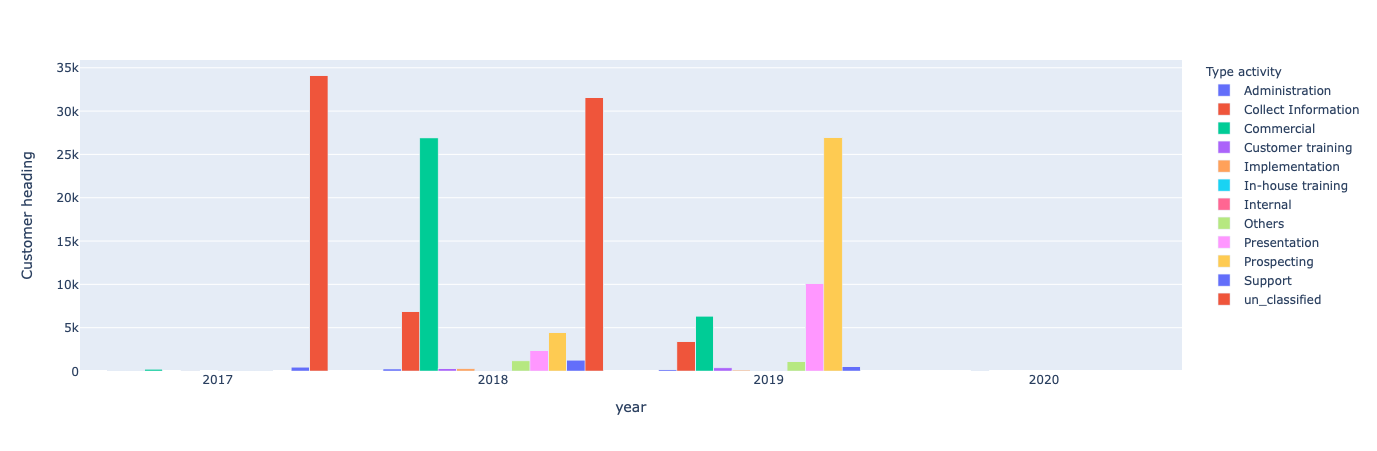

In [428]:
# all clients, not filterted to madrid
px.bar(data_frame = plot, x = 'year', y = 'Customer heading', color = 'Type activity',
       barmode='group', width = 1100, height = 700)

#### STEP 2.1.2.3 AGREGATE ACTIVITIES : Avarage Number of Activities By Seller To Clients Department
This can help us identify which sellers are better then other.

Feature could be usefull for training the model

In [317]:
seller_activities_by_seller = pd.pivot_table(data = activities_x_school, index = ['Current Seller id'], values = ['Customer heading','num_cicle'], 
                                         columns = 'year', aggfunc = {'Customer heading':lambda x: len(x.unique()),'num_cicle':np.sum}, 
                                         margins = True, fill_value = 0).reset_index()



In [340]:
seller_activities_by_seller['avg_client_visits',  2017] = round(seller_activities_by_seller['num_cicle',  2017] / seller_activities_by_seller['Customer heading',  2017] * 100, 0)
seller_activities_by_seller['avg_client_visits',  2018] = round(seller_activities_by_seller['num_cicle',  2018] / seller_activities_by_seller['Customer heading',  2018] * 100, 0)
seller_activities_by_seller['avg_client_visits',  2019] = round(seller_activities_by_seller['num_cicle',  2019] / seller_activities_by_seller['Customer heading',  2019] * 100, 0)
seller_activities_by_seller['avg_client_visits',  2020] = round(seller_activities_by_seller['num_cicle',  2020] / seller_activities_by_seller['Customer heading',  2020] * 100, 0)

# fill null values
seller_activities_by_seller = seller_activities_by_seller.fillna(0)

#format data type
seller_activities_by_seller['avg_client_visits',  2017] = seller_activities_by_seller['avg_client_visits',  2017].astype(int)
seller_activities_by_seller['avg_client_visits',  2018] = seller_activities_by_seller['avg_client_visits',  2018].astype(int)
seller_activities_by_seller['avg_client_visits',  2019] = seller_activities_by_sellerseller_activities_by_seller['avg_client_visits',  2019].astype(int)
seller_activities_by_seller['avg_client_visits',  2020] = seller_activities_x_client['avg_client_visits',  2020].astype(int)

In [341]:
seller_activities_by_seller.head()

index Current Seller id Customer heading                     num_cicle  \
year                                     2017 2018 2019 2020  All      2017   
0        0               100               85  100   91    0  110       316   
1        1               101              113  120  110    0  128       409   
2        2               102               93  106  106    0  112       584   
3        3               103               86   93   87    0  105       483   
4        4               104               19  116  116    0  132        63   

                           avg_client_visits                  
year  2018 2019 2020   All              2017  2018 2019 2020  
0     1120  654    0  2090               372  1120  719    0  
1     1016  630    0  2055               362   847  573    0  
2     1534  967    0  3085               628  1447  912    0  
3      819  493    0  1795               562   881  567    0  
4      621  490    0  1174               332   535  422    0

#### STEP 2.1.2.2 Avarage Number of Activities By Seller To Unique Client
This combined with number of sales wil yield a ratio of how 'effective' visits are for increasing revenue.

While combined with churn rate could allow us to spot relationships with number of visits.

In [346]:
#seller_activities_x_client
pd.pivot_table(data = activities_x_school, index = ['Current Seller id', 'Customer heading'], values = 'Date', 
                                         columns = 'year', aggfunc = 'count', 
                                         margins = True, fill_value = 0).reset_index()

year                                 2017   2018   2019  2020     All
Current Seller id Customer heading                                   
100.0             136458                0      1      3     0       4
                  136532                0      2      5     0       7
                  136583                2      0      4     0       6
                  136600                6      6      5     0      17
                  136655                1      0      0     0       1
...                                   ...    ...    ...   ...     ...
213.0             209975                0      1      0     0       1
                  210221                1      4      0     0       5
                  211409                1      0      0     0       1
                  212536                2      4      0     0       6
All                                 34589  74800  48688     1  158078

[14943 rows x 5 columns]

> Aditional analysis could include similar tables combined with the number by taking into acount activity type as well. Since by defenition some acitivies such as support and prospection might not direclty impact sales number per exsisting customber by activity.

### STEP 2.1.3 - SURVEY COMPLETE MERGE
pd.merge(left = survey, right = activities)

### STEP 2.1.3 - SURVEY FEATURE GENERATION
The purpose of this is create meaninful features that may help calculate sales KPIs.

**MERGING**
 - from school_location : current_seller_id, institution, titularity, province : by Customer heading
 - from activities : 

**FEATURE GENERATION:**
 - Client_SKU : represents individual id for *Customer_ID* + *Course* + *Subject*.
 - SKU : represents individual id for each product *Course* + *Subject*
 - 

In [226]:
display(survey.head(), survey.describe(), survey.info(), survey.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2773332 entries, 0 to 2773331
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Year                    int64 
 1   Course                  int64 
 2   Subject                 int64 
 3   Language                int64 
 4   Type Current Support    int64 
 5   # copies                int64 
 6   Publishing group        int64 
 7   Customer heading        int64 
 8   N_Lang                  object
 9   N_Support               object
 10  N_Subject               object
 11  N_Educational Material  object
 12  N_Course                object
dtypes: int64(8), object(5)
memory usage: 296.2+ MB


,Year,Course,Subject,Language,Type Current Support,# copies,Publishing group,Customer heading,N_Lang,N_Support,N_Subject,N_Educational Material,N_Course
0,2015,26,13,11,1,19,0,121271,Galician,Paper,Natural Sciences,Basic,1º Primary
1,2015,26,13,11,1,16,0,121274,Galician,Paper,Natural Sciences,Basic,1º Primary
2,2015,26,13,11,1,25,0,121280,Galician,Paper,Natural Sciences,Basic,1º Primary
3,2015,26,13,11,1,51,0,121285,Galician,Paper,Natural Sciences,Basic,1º Primary
4,2015,26,13,11,1,4,0,125655,Galician,Paper,Natural Sciences,Basic,1º Primary


,Year,Course,Subject,Language,Type Current Support,# copies,Publishing group,Customer heading
count,2.773332e+06,2.773332e+06,2.773332e+06,2.773332e+06,2.773332e+06,2.773332e+06,2773332.0,2.773332e+06
mean,2.017007e+03,2.852585e+01,7.393090e+01,1.326360e+01,1.009602e+00,3.673845e+01,0.0,1.495866e+05
std,1.408811e+00,1.702828e+00,6.571355e+01,2.703456e+00,9.943591e-02,2.969206e+01,0.0,2.741407e+04
min,2.015000e+03,2.600000e+01,1.300000e+01,1.000000e+01,0.000000e+00,0.000000e+00,0.0,1.139580e+05
25%,2.016000e+03,2.700000e+01,4.800000e+01,1.300000e+01,1.000000e+00,1.700000e+01,0.0,1.254830e+05
50%,2.017000e+03,2.900000e+01,5.400000e+01,1.300000e+01,1.000000e+00,2.800000e+01,0.0,1.371560e+05
75%,2.018000e+03,3.000000e+01,7.300000e+01,1.300000e+01,1.000000e+00,5.000000e+01,0.0,1.714120e+05
max,2.019000e+03,3.100000e+01,9.000000e+02,2.600000e+01,4.000000e+00,1.662000e+03,0.0,2.128310e+05


None

Year                            0
Course                          0
Subject                         0
Language                        0
Type Current Support            0
# copies                        0
Publishing group                0
Customer heading                0
N_Lang                          0
N_Support                       0
N_Subject                 1210899
N_Educational Material          0
N_Course                        0
dtype: int64

In [238]:
survey.loc[survey['N_Subject'].isnull()]['Subject'].unique()
#survey['Subject'].unique()

array([ 18,  21,  38,  48,  53,  63,  70,  73,  87,  88, 229, 230, 236,
       238, 239, 243, 265, 266, 267, 270, 271, 272, 249,  29,  47,  25,
       274,  85,  72,  84, 259, 278, 299, 292, 275, 900, 293])

## NOT THERE YET - MAPS

In [351]:
mad = school_locations.loc[school_locations['Region'] == 'Madrid']

In [352]:
mad['Current Seller id'] = mad['Current Seller id'].astype('int').copy()

/Users/pma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [353]:
display(mad.shape, mad.head())

(2501, 9)

,Customer heading,Latitude,Longitude,Town,Province,Region,Current Seller id,Institution,Titularity
7315,136369,40.428274,-3.681298,MADRID,Madrid,Madrid,208,No,Catholic
7316,136370,40.408230,-3.676975,MADRID,Madrid,Madrid,208,No,Catholic
7317,136372,40.372197,-3.760104,MADRID,Madrid,Madrid,208,No,Catholic
7318,136377,40.603361,-3.712042,TRES CANTOS,Madrid,Madrid,117,Yes,Public
7319,136378,40.242364,-3.704871,PINTO,Madrid,Madrid,189,No,Catholic


In [354]:
# 18 individual sellers
mad.pivot_table(index = 'Current Seller id',values = 'Customer heading',aggfunc = 'count')

,Customer heading
Current Seller id,
100,141
102,173
106,12
116,201
117,130
124,130
129,1
130,150
131,217


In [355]:
import plotly.express as px
px.set_mapbox_access_token('pk.eyJ1IjoicGEtc3R1ZGVudCIsImEiOiJjazcyeDV1czkwM2I5M2VwZnd0N216MWR6In0.ulFjoXkyMJHnF68iX0VZWQ')

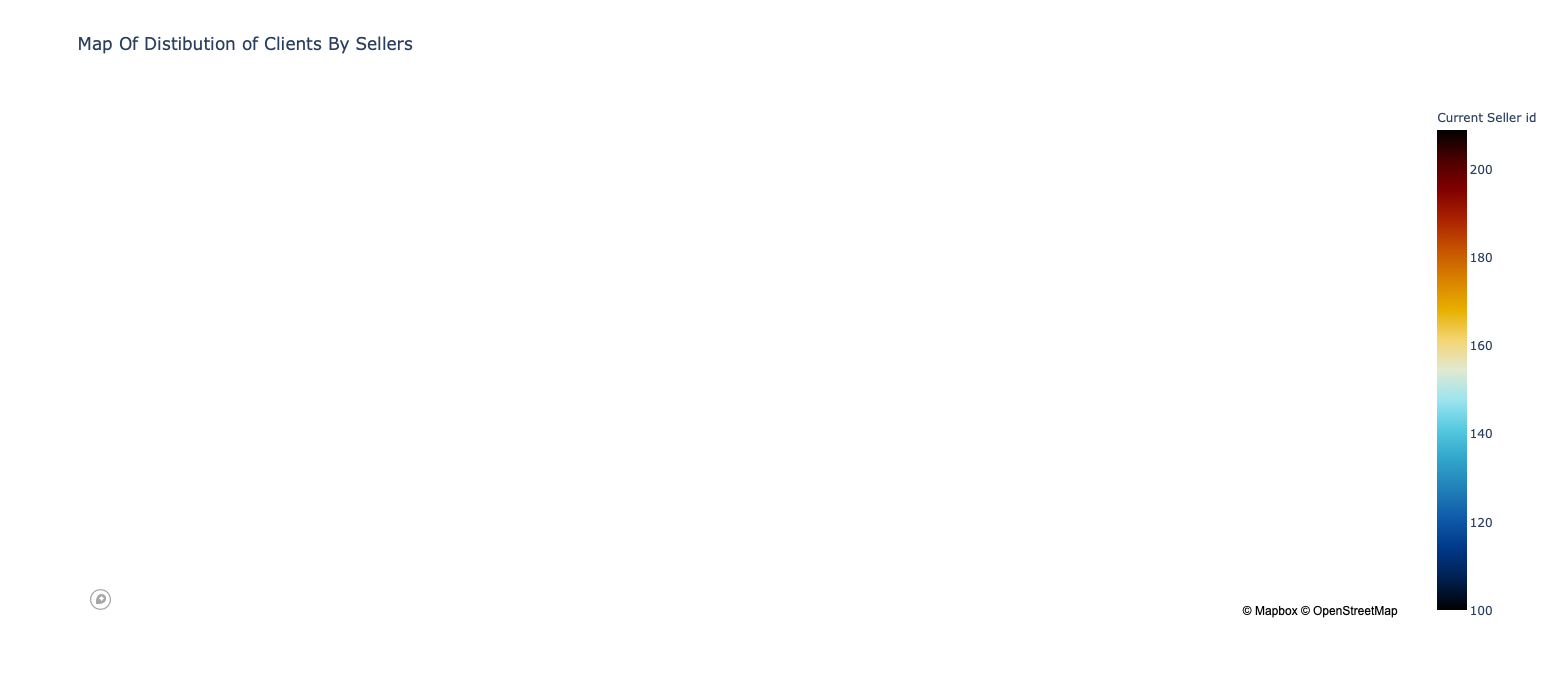

In [378]:
fig = px.scatter_mapbox(data_frame = mad, lat = 'Latitude', lon = 'Longitude',
               labels = 'Institution', color_continuous_scale = px.colors.cyclical.IceFire, 
                size_max = 20, zoom = 10, color = 'Current Seller id', title = 'Map Of Distibution of Clients By Sellers',
                        width = 1100, height = 700).show()

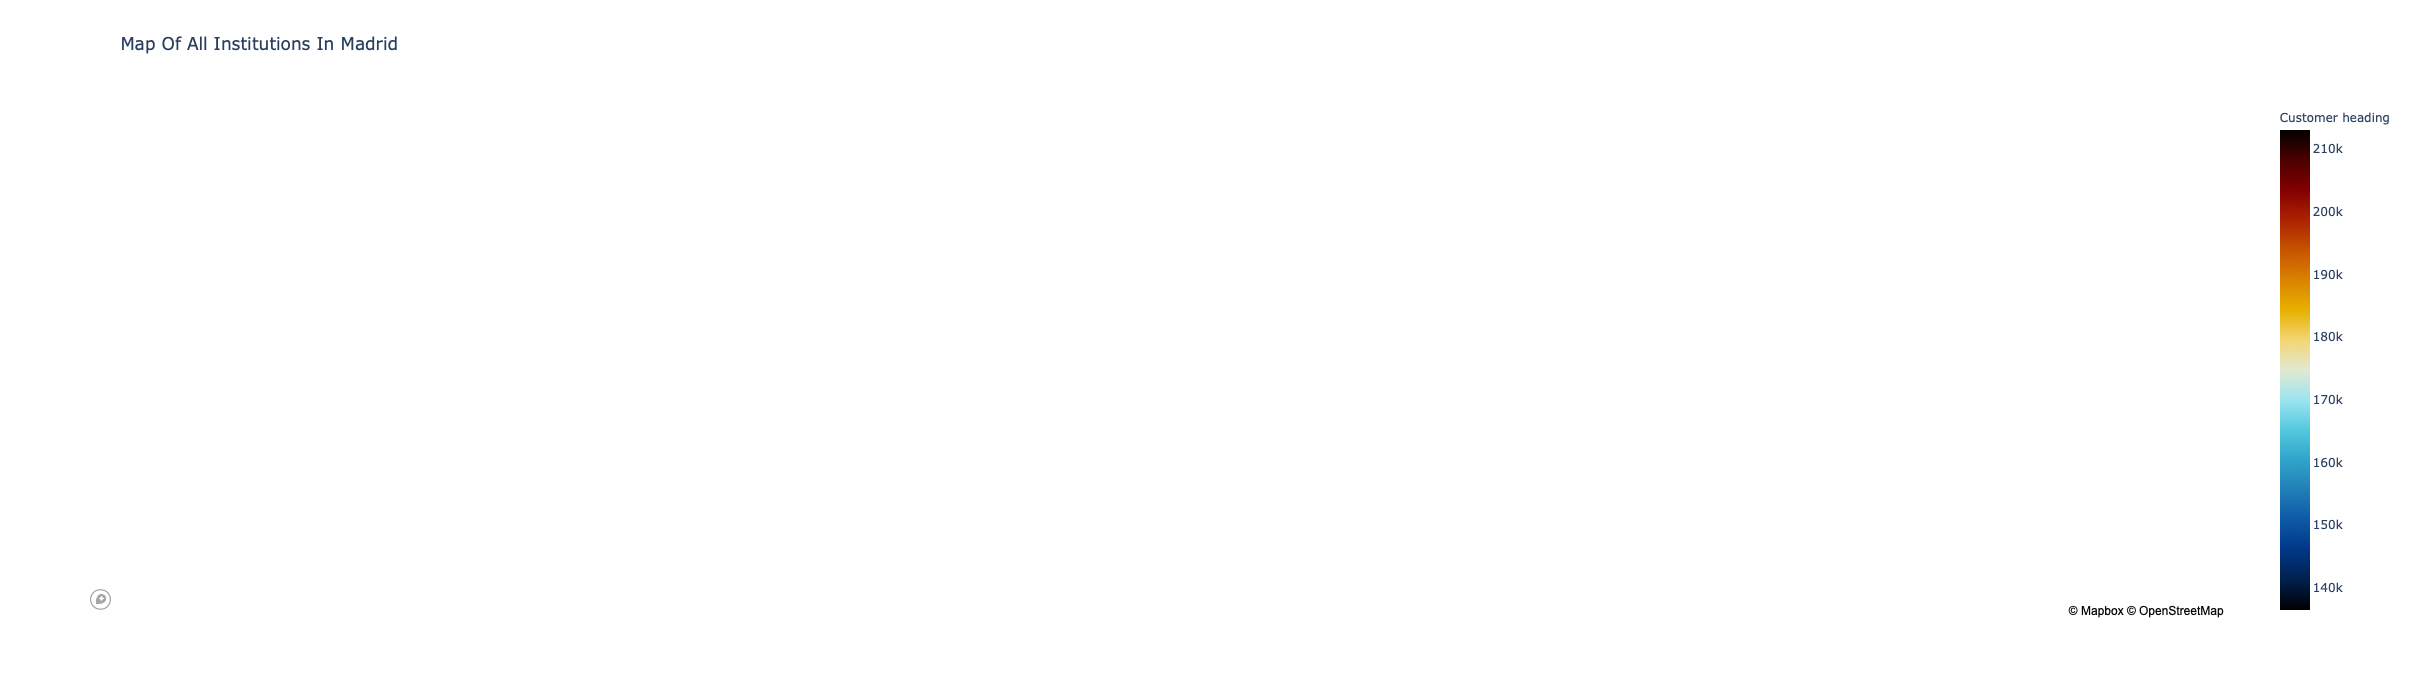

In [377]:
fig = px.scatter_mapbox(data_frame = mad, lat = 'Latitude', lon = 'Longitude',
               labels = 'Institution', color_continuous_scale = px.colors.cyclical.IceFire, size_max = 20, 
                        zoom = 10, color = 'Customer heading', width = 1100, height = 700, title = 'Map Of All Institutions In Madrid').show()

In [ ]:
school_locations.columns

In [ ]:
df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth(df, geojson=geojson, color="Bergeron",
                    locations="district", featureidkey="properties.district",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth(mad, geojson=geojson, color="Current Seller id",
                    locations="Province", featureidkey="properties.province",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
df.head()

# STEP 3 - CONCLUSIONS